In [2]:
import copy
import sys        
import os
import pyranges as pr
import pandas as pd
import numpy as np
import scipy.stats
import pyreadr
import pyBigWig
import seaborn as sns
import torch
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, f1_score
import matplotlib.pyplot as plt
import matplotlib
from statannotations.Annotator import Annotator
import openpyxl

In [4]:
### Finding all the 

xlsx_file_path = "../../data/1-s2.0-S1097276518303514-mmc4.xlsx"



def find_index(element, my_list):
    return next((index for index, value in enumerate(my_list) if value == element), -1)


# Load the XLSX file
workbook = openpyxl.load_workbook(xlsx_file_path)
sheet = workbook['logo_5mers.prop_in_logo']  # Replace "Sheet1" with the actual sheet name
data = []
for row in sheet.iter_rows(values_only=True):
    data.append(row)

strong_motifs = []
seq_only = []
motif_tup = []
r1_val = []
protein_name = []
iteri =0 
# Print the data

for i,row in enumerate(data):
    if i == 0:
        continue
    if i == 1:
        for j in range(0,int(len(row)/2)):
            protein_name.append(row[(j*2)])
    if i > 1:        
        for j in range(0,int(len(row)/2)):
            mot = row[(j*2)]
            r1 = row[(j*2)+1]
            if mot not in strong_motifs and mot!=None and r1 >= 0.1:
                strong_motifs.append(mot)
                seq_only.append(mot)
                motif_tup.append((protein_name[j],mot,iteri))
                iteri +=1
                r1_val.append(r1)
            elif mot in strong_motifs: 
                ind = find_index(mot,strong_motifs)
                if r1_val[ind] < r1 :
                    r1_val[ind] = r1


print (motif_tup)
print (len(protein_name))
print ("Strong motifs with stepwise R-1 above 0.1:",sum(np.array(r1_val) > 0.1 * 1))

[('A1CF', 'AATTA', 0), ('BOLL', 'TTTTT', 1), ('CELF1', 'TATGT', 2), ('CNOT4', 'ACACA', 3), ('DAZAP1', 'ATATA', 4), ('EIF4G2', 'GTTGC', 5), ('ESRP1', 'GGGGG', 6), ('FUBP3', 'TATAT', 7), ('HNRNPA0', 'TATAG', 8), ('HNRNPD', 'TATTA', 9), ('HNRNPDL', 'TAATT', 10), ('HNRNPK', 'GCCCA', 11), ('KHDRBS2', 'ATAAA', 12), ('KHSRP', 'TGTAT', 13), ('MBNL1', 'CGCTT', 14), ('MSI1', 'TAGTT', 15), ('NOVA1', 'TTCAT', 16), ('NUPL2', 'AAAAA', 17), ('PCBP1', 'GCCCC', 18), ('PCBP2', 'CCCCC', 19), ('PCBP4', 'ATCCC', 20), ('PRR3', 'ATAAG', 21), ('PTBP3', 'TTTCT', 22), ('RBFOX2', 'GCATG', 23), ('RBM22', 'ACCGG', 24), ('RBM24', 'GTGTG', 25), ('RBM4', 'GCGCG', 26), ('RBM41', 'TACTT', 27), ('RBM45', 'ACGCA', 28), ('RBM47', 'AATCA', 29), ('RBM6', 'CGTCC', 30), ('RC3H1', 'ATATT', 31), ('SF1', 'TAACA', 32), ('SFPQ', 'TGTAA', 33), ('SNRPA', 'TGCAC', 34), ('SRSF10', 'AGCAG', 35), ('SRSF11', 'AGGGG', 36), ('SRSF8', 'GCAGC', 37), ('SRSF9', 'AGGAG', 38), ('TARDBP', 'GTATG', 39), ('TRA2A', 'GAAGA', 40), ('UNK', 'TTAGT', 41)

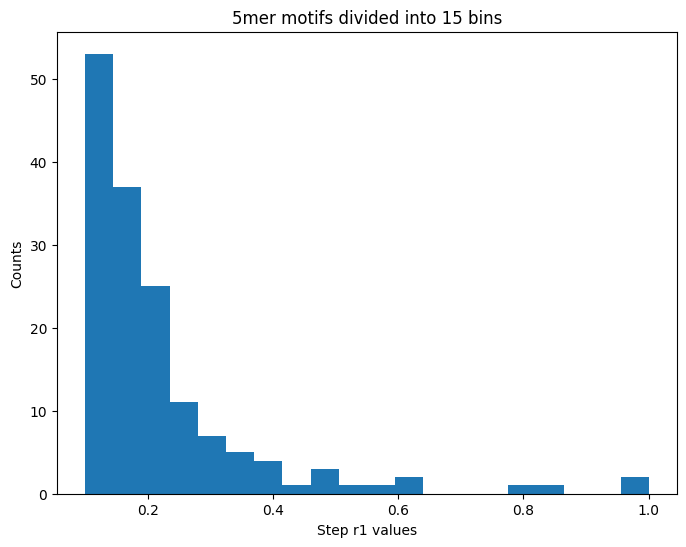

In [5]:
import matplotlib.pyplot as plt

def create_histogram(data, bins):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins)
    plt.ylabel('Counts')
    plt.xlabel('Step r1 values')
    plt.title('5mer motifs divided into 15 bins')
    #plt.xticks(data)
    plt.show()

create_histogram(r1_val,20)

In [25]:
from random_utils import MotifMetrics, LoadedMotifMetrics, MetricsHandler
from motifs import MotfiHandler

new_motifs = MotfiHandler(motif_tup)
# paths
data_dir = "/home/anas/Desktop/code/ML4RG-2023-project/dataset/data/"
results_dir = data_dir + "results/"

scer_paths = [
    results_dir + "best_markov/",
    results_dir + "dinuc/",
    results_dir + "dna_bert/cheng_bertadn/",
    results_dir + "species_agnostic/",
    results_dir + "species_aware_in_scer/",
]

# how to name the models (same order as above)
scer_names= ["11-mer",
        "Dinucleotide distribution",
        "DNABERT",
        "Species-agnostic", 
        "Species-aware"]

# test set 
scer_test_path = data_dir + "Scer_half_life.csv"

In [7]:
our_config = {"fixed_length":5,"exclude_random":motif_tup}
import pickle 
with open("../../data/exclude_motifs.pickle", "wb") as f:
    pickle.dump(our_config, f)
# combining all metrics
# scer_mh = MetricsHandler(scer_paths, scer_names, scer_test_path, 
#                          motifs=new_motifs, seq_col="UTR3_seq",
#                          n_random_kmers=10,existing_probas=[True, False,True,False,False,],optional_config=our_config)

In [27]:
print (seq_only)

['AATTA', 'TTTTT', 'TATGT', 'ACACA', 'ATATA', 'GTTGC', 'GGGGG', 'TATAT', 'TATAG', 'TATTA', 'TAATT', 'GCCCA', 'ATAAA', 'TGTAT', 'CGCTT', 'TAGTT', 'TTCAT', 'AAAAA', 'GCCCC', 'CCCCC', 'ATCCC', 'ATAAG', 'TTTCT', 'GCATG', 'ACCGG', 'GTGTG', 'GCGCG', 'TACTT', 'ACGCA', 'AATCA', 'CGTCC', 'ATATT', 'TAACA', 'TGTAA', 'TGCAC', 'AGCAG', 'AGGGG', 'GCAGC', 'AGGAG', 'GTATG', 'GAAGA', 'TTAGT', 'TTAAT', 'TATTT', 'GGATG', 'TTTGT', 'ACAGA', 'TTTTA', 'GCGAG', 'TTATT', 'GGTGG', 'ATTAG', 'ATTTT', 'TAATA', 'CACGC', 'ACATA', 'ATACA', 'CAACA', 'TTAAA', 'TGTTT', 'GCTGC', 'AAAAG', 'AAAAT', 'CCCCA', 'TTCCC', 'TCTTT', 'TTCTT', 'GCACG', 'TCCGG', 'CCTCC', 'GTGTT', 'GGGGC', 'GCGCA', 'TACAT', 'CGCGG', 'GTCCC', 'TTATA', 'TAACC', 'GTAAG', 'GCACA', 'GCAGT', 'AGGAA', 'AAGAA', 'ATTAA', 'GATCG', 'TGTGT', 'TATAA', 'CGCCG', 'GGGGT', 'GGGTG', 'TTTAT', 'TTTAG', 'GGGTA', 'TAAAT', 'TGGGG', 'CATCA', 'TAAAA', 'CGCGC', 'ATGAG', 'CTATC', 'TCTCT', 'TGTAC', 'TACCG', 'GCGTA', 'TACGT', 'ATAAT', 'GCGGG', 'TCCAC', 'TAGTG', 'AGCAC', 'CAGCA', 

In [28]:
scer_mh.motif_df["motif_range"]

0         (347188, 347193)
1         (197634, 197639)
2         (451290, 451295)
3         (218729, 218734)
4         (571402, 571407)
                ...       
166427    (615891, 615896)
166428    (619890, 619895)
166429    (627375, 627380)
166430    (632003, 632008)
166431    (633109, 633114)
Name: motif_range, Length: 166432, dtype: object